# Q6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, train_size=0.7,test_size=0.3, random_state=101)

Part A:

In [108]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
class ForwardSelection:
    def __init__(self,train_data,train_label,test_data,test_label):
        self.train = np.array(train_data)
        self.train_label = train_label.reshape(-1,1)
        self.test = np.array(test_data)
        self.test_label = test_label.reshape(-1,1)
    def forward(self):
        selected_features_index = []
        acc_list = []
        for j in range(len(self.train[0])):
            temp_acc = list('')
            for i in range(len(self.train[0])):
                '''Write your code here'''
                x = self.train[:, i].reshape((self.train.shape[0],1))
                x_test = self.test[:, i].reshape((self.test.shape[0],1))
                for feature in selected_features_index:
                    x = np.concatenate((x, self.train[:, feature].reshape(-1,1)), axis=1)
                    x_test = np.concatenate((x_test, self.test[:, feature].reshape(-1,1)), axis=1)
                clf = MultinomialNB()

                if j == 0:
                    x = x.reshape(-1,1)
                    x_test = x_test.reshape(-1,1)
                clf.fit(x, self.train_label)
                temp_acc.append(accuracy_score(self.test_label.reshape(-1,1), clf.predict(x_test).reshape(-1,1)))
            selected_features_index.append(np.argmax(np.array(temp_acc)))
            acc_list.append(temp_acc[selected_features_index[-1]])

        return selected_features_index,acc_list

In [ ]:
f = ForwardSelection(X_train,y_train,X_test,y_test)
selected,acc_list = f.forward()

/tmp/ipykernel_8316/1455528089.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(selected)


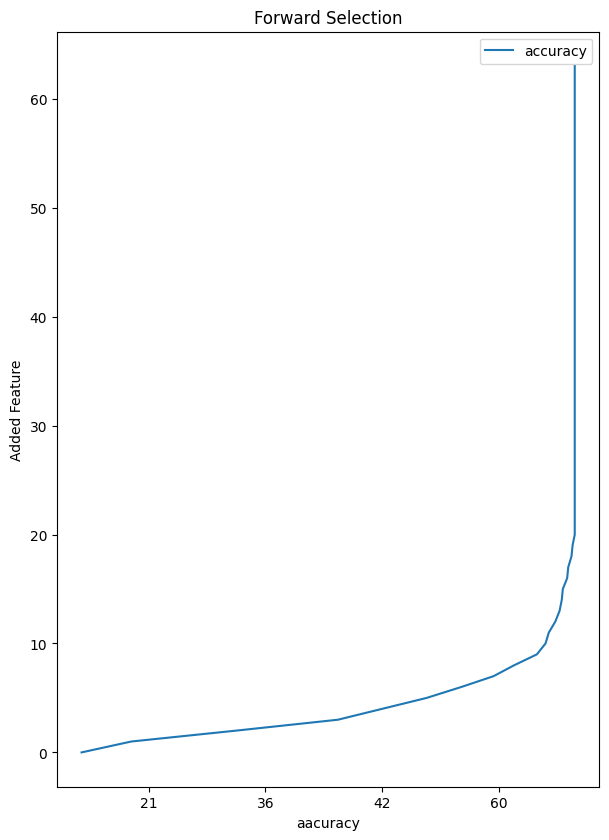

In [135]:
import pandas as pd
df = pd.DataFrame({'accuracy': range(len(acc_list)), 'x': acc_list})
df.plot(x='x', figsize=(7,10))
plt.gcf().set_dpi(100)
plt.xlabel("aacuracy")
plt.ylabel("Added Feature")
plt.yticks(, selected)
plt.title("Forward Selection")
plt.show()

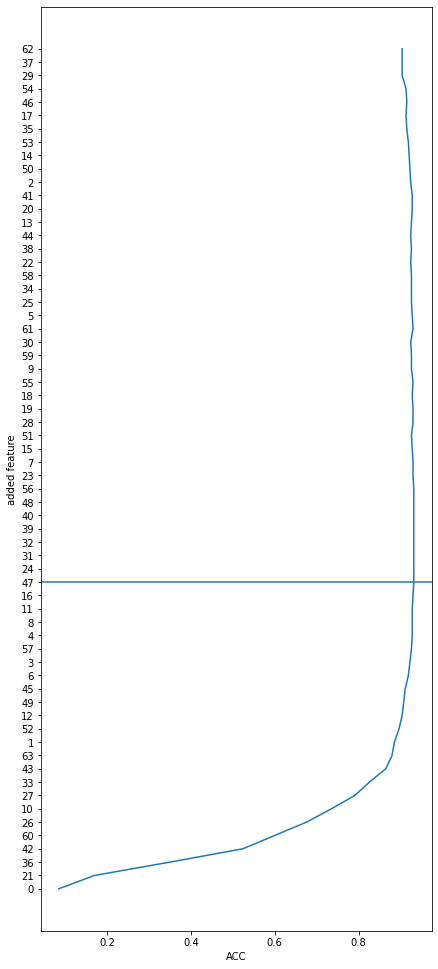

In [57]:
'''write your code here to show figure like:'''

Part B:

In [140]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
class BackwardSelection:
    def __init__(self,train_data,train_label,test_data,test_label):
        self.train = np.array(train_data)
        self.train_label = train_label.reshape(-1,1)
        self.test = np.array(test_data)
        self.test_label = test_label.reshape(-1,1)
    def backward(self):
        removed_features_index = []
        acc_list = []
        for j in range(len(self.train[0])):
            temp_acc = list('')
            for i in range(len(self.train[0])-1):
                '''Write your code here'''
                x = self.train
                x_test = self.test
                for feature in removed_features_index:
                    x = np.delete(x, feature, 1)
                    x_test = np.delete(x_test, feature, 1)

                if j == len(self.train[0]):
                    x = x.reshape(-1,1)
                    x_test = x_test.reshape(-1,1)
                
                clf = MultinomialNB()
                clf.fit(x, self.train_label)
                temp_acc.append(accuracy_score(self.test_label.reshape(-1,1), clf.predict(x_test).reshape(-1,1)))
            
            removed_features_index.append(np.argmax(np.array(temp_acc)))
            acc_list.append(temp_acc[removed_features_index[-1]])  
        return removed_features_index,acc_list

In [ ]:
b = BackwardSelection(X_train,y_train,X_test,y_test)
removed,acc_list = b.backward()

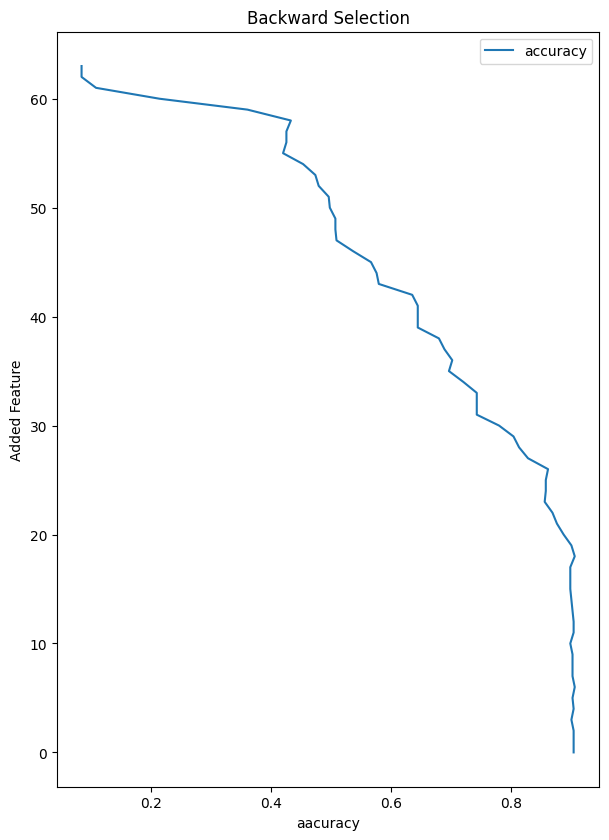

In [144]:
df = pd.DataFrame({'accuracy': range(len(acc_list)), 'x': acc_list})
df.plot(x='x', figsize=(7,10))
plt.gcf().set_dpi(100)
plt.xlabel("aacuracy")
plt.ylabel("Added Feature")
#plt.yticks(, selected)
plt.title("Backward Selection")
plt.show()

# Q7

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [116]:
def Si(data, labels=None):
    # Si Covariance matrix of the ith class

    m = data.mean(axis = 0)
    ans = np.zeros((m.shape[0], m.shape[0]))
    for sample in data:
        ans += (sample - m).reshape(-1,1) @ (sample - m).reshape(-1,1).T
    return ans

def Sw(data, labels):
    # Sw Within-class scatter matrix

    classes = list('')
    for i in range(np.unique(labels).shape[0]):
        classes.append(list(''))
    for i in range(data.shape[0]):
        classes[labels[i]].append(data[i])
    ans = np.zeros((data.shape[1], data.shape[1]))
    for i in range(np.unique(labels).shape[0]):
        ans += Si(np.array(classes[i]))
    return ans
    
def Sb(data, labels):
    # SB Between-class scatter matrix

    classes = list('')
    for i in range(np.unique(labels).shape[0]):
        classes.append(list(''))
    for i in range(data.shape[0]):
        classes[labels[i]].append(data[i])
    means = list('')
    for i in range(np.unique(labels).shape[0]):
        means.append(np.mean(np.array(classes[i]), axis=0))
    m = np.mean(np.array(means), axis=0)
    ans = np.zeros((m.shape[0], m.shape[0]))
    for i in range(np.unique(labels).shape[0]):
        ans += (len(classes[i]) * (means[i] - m).reshape(-1, 1) @ (means[i] - m).reshape(-1, 1).T)
    return (ans)

def LDA(data, labels):
    prob = np.linalg.pinv(Sw(data, labels)).dot(Sb(data, labels))
    eigen_values, eigen_vectors = np.linalg.eig(prob)
    print(prob.trace())
    #return w

In [117]:
LDA(digits.data, digits.target)

26.23380921667635


In [ ]:
w = LDA(data, labels)

# Q8

In [85]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

Part A

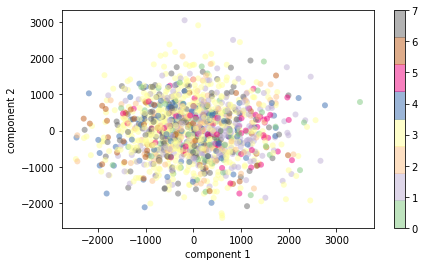

In [93]:
def PCATransformer(X, component):
    '''write your code here'''
    return projected
projected = PCATransformer(faces.data,2)
'''write your code here to show components like:'''

Part B:

Text(0, 0.5, 'cumulative explained variance')

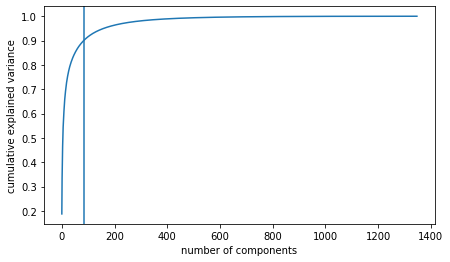

In [94]:
'''write your code here'''

Part C

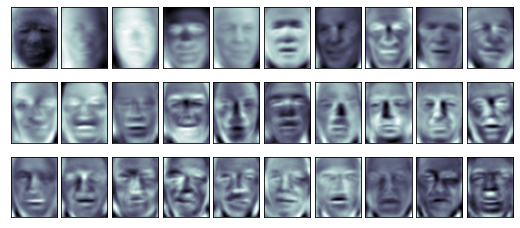

In [96]:
'''write your code here'''

Part D:

Text(0, 0.5, 'PCA-dim\nreconstruction')

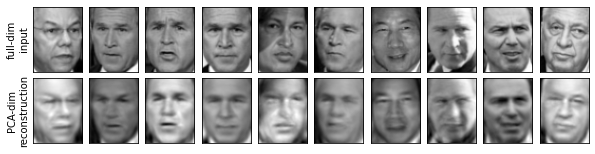

In [98]:
'''write your code here'''